### Redes neuronales (método montecarlo)

Santiago Ramón y Cajal descubrió que el sistema nervioso estaba formado por “entidades individuales”, que luego se llamaron neuronas. Dedujo que, debido a los espacios entre ellas, las neuronas deben comunicarse no por continuidad sino por contacto, (término más tarde acuñado “sinapsis”).
 
<img src="cajal_dibujo_intro_255.jpg">  
Imagen de santiago ramón y cajal
 
La neurona es la unidad fundamental del sistema nervioso y, en particular del cerebro. Se puede ver como una simple unidad de procesamiento. Una neurona típica esta compuesta de un cuerpo celular, o soma, un axón de forma tubular y multitud de dendritas, como se muestra en la figura. El axón es esencialmente un tubo largo que se ramifica en botones sinápticos que casi tocan a las dendritas de otras neuronas. Este pequeño hueco que queda entre la dendrita y el axón se llama sinapsis y es a través del cual se transmite la información. Esta información se transmite mediante estímulos. Cuando a una neurona le llegan estímulos de otras neuronas esta combina los estímulos y si el estímulo resultante es suficientemente fuerte, la neurona produce un estímulo de salida que envía por su axón.

Las redes neuronales artificiales son un modelo computacional que permite simular el comportamiento del cerebro humano.

<img src="neurona.png"> 
 
Nuestro cerebro esta compuesto por unas 10 billones de estas neuronas conectadas cada una de estas con, entre 100 y 100000. Es decir, 10 billones de pequeñas unidades procesadoras, muy simples y muy interconectadas. Esta interconexión, esta red, permite realizar las tareas tan complejas que caracterizan a los animales y sobre todo, a los seres humanos. Y es en esta red de pequeñas unidades de procesamiento en la que se inspira el modelo de las Redes Neuronales Artificiales.

De forma computacional tendremos grupos de neuronas agrupadas por capas y conectadas por unos determinados pesos, como se muestra a continuación:

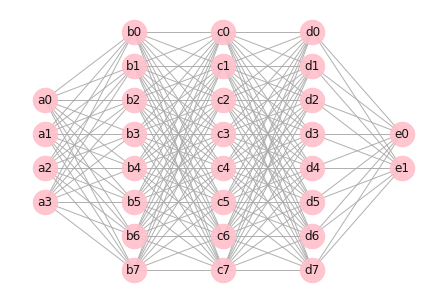

<Figure size 432x288 with 0 Axes>

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import esquema_red

capas=[4,8,8,8,2]
plot = esquema_red.red(capas,False)
plot.plt().show()

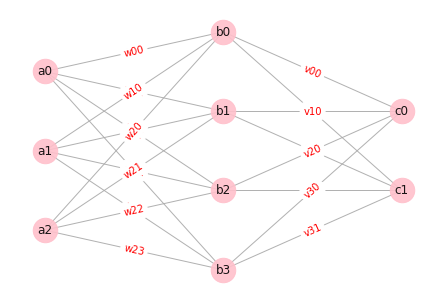

<Figure size 432x288 with 0 Axes>

In [2]:
capas=[3,4,2]
plot = esquema_red.red(capas,True)
plot.plt().show()

La salida quería como:
$$
C=g\left(VB\right)=\{B=g\left(WA\right)\}=g\left(Vg\left(WA\right) \right)
$$

$$ 
B=g\left(WA\right)\ =
\begin{pmatrix}
b_{0}\\
b_{1}\\
b_{2}\\
b_{3}\\
\end{pmatrix}
= g \left( W 
\begin{pmatrix}
a_{0} \\
a_{1} \\
a_{2} \\
\end{pmatrix} \right) = g \left( 
\begin{pmatrix}
w_{00} & w_{10} & w_{20} \\
w_{01} & w_{11} & w_{21} \\
w_{02} & w_{12} & w_{22} \\
w_{03} & w_{13} & w_{23} \\
\end{pmatrix}
\begin{pmatrix}
a_{0} \\
a_{1} \\
a_{2} \\
\end{pmatrix} \right)  =
g \begin{pmatrix}
w_{00}*a_{0} + w_{10}*a_{1} +w_{20}*a_{2} \\
w_{01}*a_{0} + w_{11}*a_{1} +w_{21}*a_{2} \\
w_{02}*a_{0} + w_{12}*a_{1} +w_{22}*a_{2} \\
w_{03}*a_{0} + w_{13}*a_{1} +w_{23}*a_{2} \\
\end{pmatrix}
$$ 

Resumiendo: $b_j = g \left( \sum_i a_i w_{ij} \right)$ donde se suele tomar $g = \frac{1}{1+e^{-x}}$


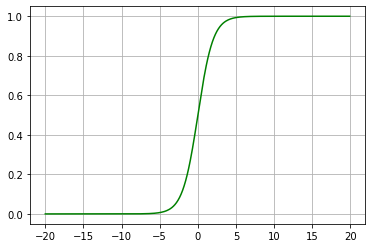

In [3]:
def g(x):
    return 1/(1+math.exp(-x))

x = np.arange(-20, 20, 0.1)
y = list(map(lambda x: g(x), x))
plt.plot(x,y,color='g')
plt.grid()

<hr>
<b><font color='red'>Ejercicio 01</font></b> 

Fíajte en el siguiente decodificador, vamos a a crear una red neuronal que aprenda a dar la misma respuesta

<img src="codificador.png">


|Input|Output|
| :-: | :-: |
| 0 0 0 0 0 0 1 | 0 0 1 |
| 0 0 0 0 0 1 0 | 0 1 0 |
| 0 0 0 0 1 0 0 | 0 1 1 |
| 0 0 0 1 0 0 0 | 1 0 0 |
| 0 0 1 0 0 0 0 | 1 0 1 |
| 0 1 0 0 0 0 0 | 1 1 0 |
| 1 0 0 0 0 0 0 | 1 1 1 |

Crea una función llamada **MIN(A,W,B,V,C,nstep)**, que devuelva **return W,V** de tal manera que minimice el error entre la matriz **C** y la salida $g\left(Vg\left(WA\right)\right)$, para ello realiza **nstep** pasos aleatorios.
Cada paso aleatorio consistira en:
 - Selecionamos un elemento al azar de W(rand,rand)
 - Le asignamos un número de tipo coma flotante aleatorio entre -100 y 100 
 - En el caso en el que el error sea menor que el anterior nos lo quedamos. Toma el error como la raiz cuadrada de la diferencia de los cuadrados de Z y C, siendo Z la salida en la tercera capa y C lo que debería salir, para este caso de 3 neuronas : $error=\sqrt{(Z_0-C_0)^2+(Z_1-C_1)^2+(Z_2-C_2)^2}$
 - Hacemos lo mismo con la matriz V
 
 ayuda: Crea la función **getOut(A,W,B,V,C):** que calcula $g\left(Vg\left(WA\right)\right)$, de esta forma si Z=getOut(A,W,B,V,C)

Vamos a empezar ajustando uno de los casos:


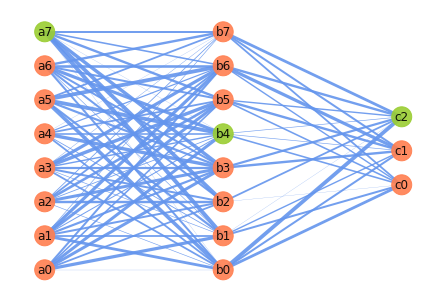

<Figure size 432x288 with 0 Axes>

In [4]:
#Capas de neuronas
A=[0,0,0,0,0,0,0,1]
B=[0,0,0,0,1,0,0,0]
C=[0,0,1]

#Interconexiones, generamos una matriz de nº aleatorios 
W = np.array([[random.randint(-10,10)/10 for j in range(len(B))] for i in range(len(A))])
V = np.array([[random.randint(-10,10)/10 for j in range(len(A))] for i in range(len(B))])

plot.Pintar(A,W,B,V,C).show()

In [5]:
#Crea aquí tus funciones:
#def getOut(A,W,B,V,C):
#def error(A,W,B,V,C):
#def MIN(A,W,B,V,C,nstep):

In [6]:
def bin(Z):
    b=[]
    for i in Z:
        if i < 0.5:
            b.append(0)
        else:
            b.append(1)
    return b 

In [7]:
# W,V=MIN(A,W,B,V,C,1000)
# Z=getOut(A,W,B,V,C)
# print(A,C,bin(Z))
# plot.Pintar(A,W,B,V,C).show()

Solución
<img src="ejercicio01.png">

<hr>
<b><font color='red'>Ejercicio 02</font></b> 

Ahora vamos a minimizar el error para todos los casos posibles, serán funciones parecidas pero ahora se quedarán con el cambio en los pesos cuando sea minimo para todos los casos

In [8]:
AT=[[0,0,0,0,0,0,1],
    [0,0,0,0,0,1,0],
    [0,0,0,0,1,0,0],
    [0,0,0,1,0,0,0],
    [0,0,1,0,0,0,0],
    [0,1,0,0,0,0,0],
    [1,0,0,0,0,0,0]]
CT=[[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]]
    
#Interconexiones, generamos una matriz de nº aleatorios 
W = np.array([[random.randint(-10,10)/10 for j in range(len(B))] for i in range(len(A))])
V = np.array([[random.randint(-10,10)/10 for j in range(len(A))] for i in range(len(B))])

In [9]:
#Para ello crea aquí tus funciones:
#def errorT(A,W,B,V,C):
#def MINT(A,W,B,V,C,nstep):

Vamos a aumentar el número de casos

In [10]:
# for i in range(20):
#     W,V=MINT(AT,W,B,V,CT,200,0)

In [11]:
# for a,c in zip(AT,CT):
#     Z=getOut(a,W,B,V,c)
#     if c == bin(Z):
#         print(a,c,bin(Z))
#     else:
#         print(a,c,bin(Z),'*')

In [12]:
# plot.Pintar(AT[0],W,B,V,CT[0]).show()

Solución
<img src="ejercicio02.png">

<hr>
<b><font color='red'>Ejercicio 03</font></b> 

Vamos a ver como nuestra red neuronal aprende a sumar para ello utilizaremos 3 capas de neuronas:

ayuda: reutiza todo el código anterior

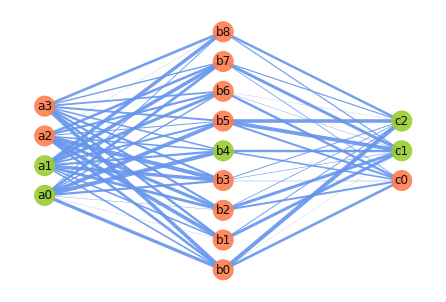

<Figure size 432x288 with 0 Axes>

In [13]:
#Capas de neuronas
A=[1,1,0,0]
B=[0,0,0,0,1,0,0,0,0]
C=[0,1,1]

#Interconexiones, generamos una matriz de nº aleatorios 
W = np.array([[random.randint(-10,10)/10 for j in range(len(B))] for i in range(len(A))])
V = np.array([[random.randint(-10,10)/10 for j in range(len(A))] for i in range(len(B))])

plot.Pintar(A,W,B,V,C).show()

In [14]:
# W,V=MIN(A,W,B,V,C,1000)
# Z=getOut(A,W,B,V,C)
# print(A,C,bin(Z))
# plot.Pintar(A,W,B,V,C).show()

Ahora lo hacemos para todos los casos posibles

In [15]:
AT=[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],
     [0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],
     [1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],
     [1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]]
CT=[[0,0,0],[0,0,1],[0,1,0],[0,1,1],
      [0,0,1],[0,1,0],[0,1,1],[1,0,0],
      [0,1,0],[0,1,1],[1,0,0],[1,0,1],
      [0,1,1],[1,0,0],[1,0,1],[1,1,0]]

#condiciones iniciales, W y V con valores aleatorios
W = np.array([[random.randint(-10,10)/10 for j in range(len(B))] for i in range(len(A))])
V = np.array([[random.randint(-10,10)/10 for j in range(len(A))] for i in range(len(B))])

In [16]:
# for i in range(20):
#     W,V=MINT(AT,W,B,V,CT,200,0)

In [17]:
# for a,c in zip(AT,CT):
#     Z=getOut(a,W,B,V,c)
#     if c == bin(Z):
#         print(a,c,bin(Z))
#     else:
#         print(a,c,bin(Z),'*')